# Notebook demonstrating Linear Regression using SciKit Learn and Numpy

In this section we will be working through linear regression with the following steps:

Step 1: Getting and setting up the data.

Step 2: Visualizing current data.

Step 3: The mathematics behind the Least Squares Method.

Step 4: Using Numpy for a Univariate Linear Regression.

Step 5: Getting the error.

Step 6: Using scikit learn to implement a multivariate regression.

Step 7: Using Training and Validation.  

Step 8: Predicting Prices

Step 9 : Residual Plots


In [2]:
import numpy as np
import pandas as pd 
from pandas import Series , DataFrame

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline


In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [6]:
print boston.DESCR


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

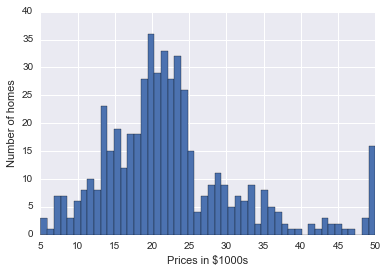

In [8]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of homes')

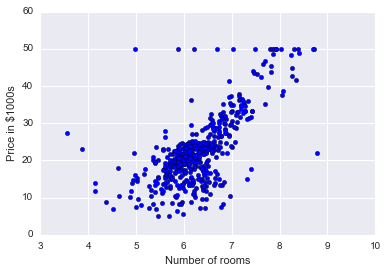

In [9]:
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [10]:
boston_df=DataFrame(boston.data
                   )

In [11]:
boston_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [12]:
boston_df.columns=boston.feature_names

In [13]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [14]:
boston_df['Price']=boston.target

In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


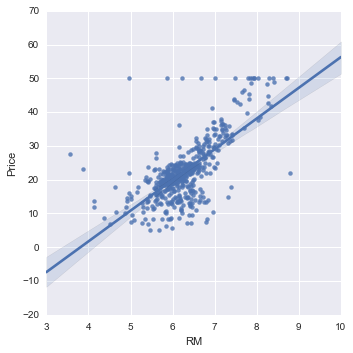

In [17]:
sns.lmplot(x='RM',y='Price',data=boston_df
          )

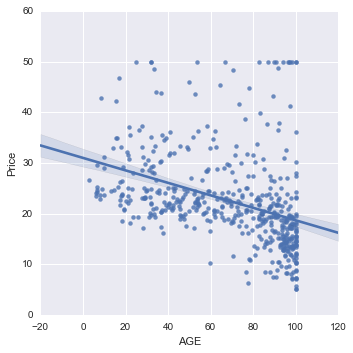

In [18]:
sns.lmplot(x='AGE',y='Price',data=boston_df)

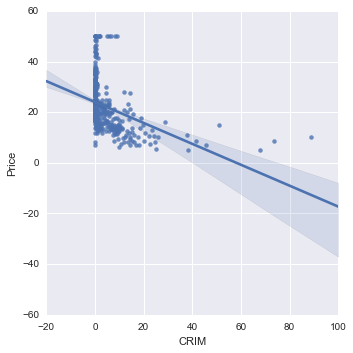

In [19]:
sns.lmplot(x='CRIM',y='Price',data=boston_df)

#### Step 3 : Least Square Method 

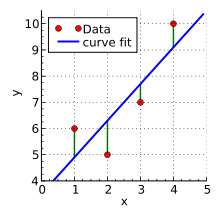

In [20]:
from IPython.display import Image

url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

#### Step 4 : Numpy for univariate Linear Regression

In [34]:
X=boston_df.RM

In [35]:
X.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [36]:
X=np.vstack(boston_df.RM)

In [37]:
X.shape

(506, 1)

In [38]:
X


array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [39]:
Y=boston_df.Price

In [40]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [55]:
X1 = np.array( [ [value,1] for value in X ] )

In [56]:
X1

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [58]:
m, b = np.linalg.lstsq(X1, Y)[0]

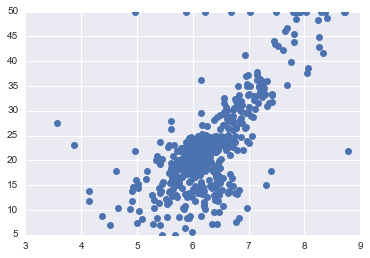

In [59]:
plt.plot(boston_df.RM,boston_df.Price,'o')

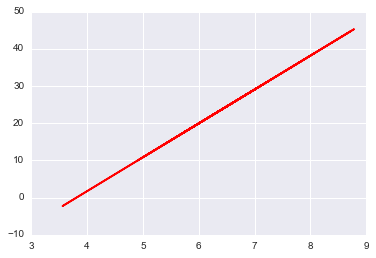

In [60]:
# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

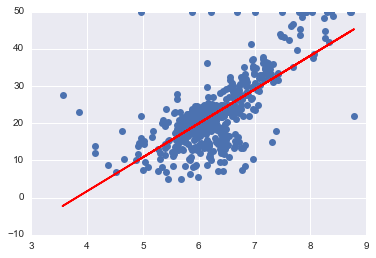

In [61]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')


#### Step5 : Error 

In [63]:
result= np.linalg.lstsq(X1,Y)

In [64]:
error_total=result[1]

In [65]:
rmse=np.sqrt(error_total/len(X1))

In [66]:
rmse

array([ 6.60307139])

#### Step 6 : Mutivariate using SciKit Learn

In [67]:
import sklearn

from sklearn.linear_model import LinearRegression

In [68]:
lreg=LinearRegression()

In [69]:
X_multi= boston_df.drop('Price',1)

Y_target=boston_df.Price

In [70]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
print("%.2f" %lreg.intercept_)

#intercept of the model

36.49


In [76]:
print (len(lreg.coef_))

13


In [87]:
coeff_df=DataFrame(boston_df.columns)
coeff_df.colums=['Features']

In [88]:
coeff_df['Coeffients']=Series(lreg.coef_)

coeff_df

,0,Coeffients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


#### Step 7 : Training and Validation 

In [90]:
X_train,X_test, Y_train, Y_test=sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [91]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379, 1) (127, 1) (379,) (127,)


In [92]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
pred_train=lreg.predict(X_train)
pred_test=lreg.predict(X_test)

In [94]:
np.mean((Y_train-pred_train)**2)

44.07847765413768

In [95]:
np.mean((Y_test-pred_test)**2)

42.21499444537296

In [97]:
(np.mean((Y_train-pred_train)**2))**0.5

6.639162421129466

In [98]:
(np.mean((Y_test-pred_test)**2))**0.5

6.497306707042

In [99]:
from sklearn.metrics import r2_score

In [100]:
r2_score(Y_train,pred_train)

0.46566784895897595

In [101]:
r2_score(Y_test,pred_test)

0.52595926215244926

#### Step 9 : Residual Plot

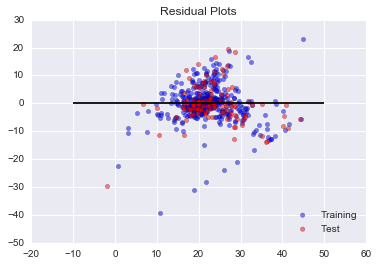

In [103]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower right')
plt.title('Residual Plots')

### The END 